### In order to run the notebook the rmftool has to be installed using pip

>pip install rmftool 

# Demonstrate the use of the CacheModel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cache_rmf import CacheModel

plot_dir = '../../latex/plots/'

/Users/sebastian/Documents/PhD/Mean-Field-Approximations-for-Heterogeneous-Systems-It-Works/notebooks and plots/caching/rmf
make: Nothing to be done for `all'.


In [2]:
# model setup

#N = 20
N = 8

#M = [int(N*0.3), int(N*0.3)]
#M = [5, 3, 2]
M = [2, 2, 2]

alpha = 0.5

model = CacheModel(N, M, alpha)

# run simulation, mf, rmf, calculate errors etc.
simu1 = model.simulate(seed=1)
errorsimu = 2*np.std([model.simulate(seed) for seed in range(10)], 0)

rmf = model.refined_mean_field()
mf = model.mean_field()

exact = model.exact()

errorsimu_miss = 2*np.std([np.sum(model.simulate(seed),1) for seed in range(10)], 0)

# Figure 4

In [3]:
def mystep(x, y, fmt, color=None, label=None):
    plt.hlines(y, x-0.5, x+0.5, color=color, label=label)
    
def plot_and_save(ax, mf, rmf, simu, errorsimu, exact, save_name=None, print_y_label=False):
    objects = 1+np.arange(len(mf))
    ax.plot(objects,mf, ':', color='green', label='Mean field')
    ax.plot(objects,rmf, '--', color='orange', label='Refined mean field')
    ax.plot(objects,simu, '-', color='cornflowerblue', label='Simulation')
    
    ax.errorbar(objects,simu, errorsimu, capsize=3, fmt="", color='cornflowerblue')
    #plt.plot(objects,exact, 'o-', label='Exact')
    ax.set_xlabel('Object $k$', fontsize=14)
    if print_y_label:
        ax.set_ylabel(r'Estimation of $\mathbb{P}(S_k=i)$', fontsize=14)

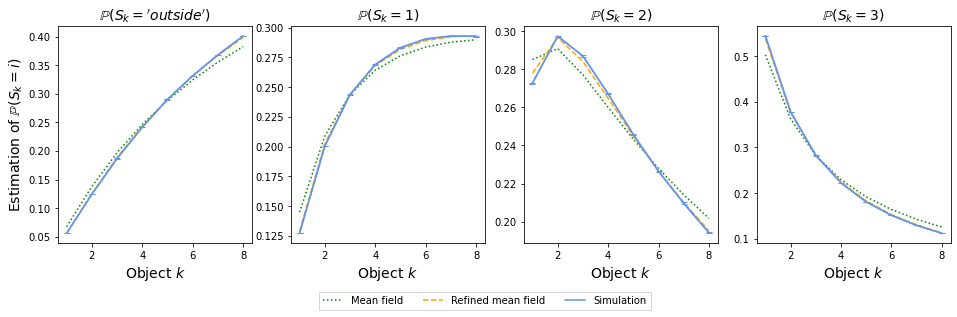

In [4]:
fig, subplot_list = plt.subplots(1, 4, sharey=False)
subplot_list = subplot_list.flatten()

fig.set_size_inches(16, 4)

for k, ax in enumerate(subplot_list):
    if k==0:
        plot_and_save(ax, 1-np.sum(mf,1), 1-np.sum(rmf,1), 1-np.sum(simu1,1), errorsimu_miss, 1-np.sum(exact,1), print_y_label=True)
        ax.set_title(r"$\mathbb{P}(S_k='outside')$", fontsize=14)
    else:
        s = k-1
        ax.set_title(r"$\mathbb{P}(S_k="+str(k)+")$", fontsize=14)
        plot_and_save(ax, mf[:,s], rmf[:,s], simu1[:,s], errorsimu[:,s], exact[:,s])
#fig.legend(['Mean field', 'Refined mean field', 'Simulation'], loc="lower right", fontsize=16)
#if save_name is not None:
#plt.savefig(save_name, bbox_inches='tight')
legends = ['Mean field', 'Refined mean field', 'Simulation']

subplot_list[1].legend(labels=legends,loc='upper center', 
     bbox_to_anchor=(1, -0.2),fancybox=False, shadow=False, ncol=4)
plt.savefig(plot_dir + 'cache_steady_state.pdf', bbox_inches='tight')